<a href="https://colab.research.google.com/github/gabrielnichio/hyperparameter-optimization-classification/blob/main/classification_hyperparameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Optimization

Dataset from Kaggle: https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

The focus here is only to document and learn about hyperparameter optimization for classification.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/content/MBA.csv')

In [3]:
data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [5]:
# this information is on Kaggle


data.drop(columns='application_id', inplace=True)
data['admission'] = data['admission'].fillna('Deny')
data['race'] = data['race'].fillna('Other')


In [6]:
data['race'].value_counts()

,count
race,
Other,2079
White,1456
Asian,1147
Black,916
Hispanic,596


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           6194 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      6194 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


In [8]:
data['admission'].value_counts()

,count
admission,
Deny,5194
Admit,900
Waitlist,100


In [9]:
fig = px.histogram(data, x='gender', color='admission')
fig.show()

In [10]:
fig = px.histogram(data, x='major')
fig.show()

In [11]:
plt.figure(figsize=(10, 10))
fig = px.box(data, x="gpa", color='race')
fig.show();

<Figure size 1000x1000 with 0 Axes>

# Data Transformation

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
x = data.drop(columns='admission')
y = data['admission']

In [14]:
columns = x.columns

one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['gender', 'international', 'major', 'race', 'work_industry']
),
    remainder='passthrough',
    sparse_threshold=0)

x = one_hot.fit_transform(x)

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [15]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(columns))

,onehotencoder__gender_Male,onehotencoder__international_True,onehotencoder__major_Business,onehotencoder__major_Humanities,onehotencoder__major_STEM,onehotencoder__race_Asian,onehotencoder__race_Black,onehotencoder__race_Hispanic,onehotencoder__race_Other,onehotencoder__race_White,...,onehotencoder__work_industry_Media/Entertainment,onehotencoder__work_industry_Nonprofit/Gov,onehotencoder__work_industry_Other,onehotencoder__work_industry_PE/VC,onehotencoder__work_industry_Real Estate,onehotencoder__work_industry_Retail,onehotencoder__work_industry_Technology,remainder__gpa,remainder__gmat,remainder__work_exp
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.30,620.0,3.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28,680.0,5.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.30,710.0,5.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.47,690.0,6.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.35,590.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.49,640.0,5.0
6190,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.18,670.0,4.0
6191,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.22,680.0,5.0
6192,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.36,590.0,5.0


In [16]:
y_counts = pd.Series(y).value_counts

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5, stratify=y, test_size=0.25)

In [18]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# KNN

For this app I'm using KNN

I'm focusing on improving the accuracy of the model

## Basic KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
knn.score(x_train, y_train)

0.8660925726587728

In [22]:
y_pred = knn.predict(x_test)

In [23]:
knn.score(x_test, y_test)

0.8205293737895416

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

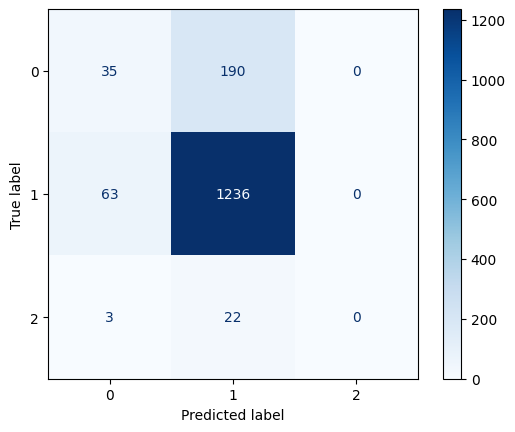

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [26]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.35      0.16      0.21       225
           1       0.85      0.95      0.90      1299
           2       0.00      0.00      0.00        25

    accuracy                           0.82      1549
   macro avg       0.40      0.37      0.37      1549
weighted avg       0.77      0.82      0.79      1549



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# KNN with GridSearchCV and Nested Cross Validation

As I'm doing hyperparameter optimization, the best aproach to Cross Validation is the Nested Cross Validation. This way the tuning does not learn from leaked information.

More information can be found here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

In [27]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score

In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [29]:
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)
outer_cv = StratifiedKFold(shuffle=True, random_state=5)

In [30]:
knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=inner_cv
)

In [31]:
knn_grid_scores = cross_val_score(knn_grid, x_train, y_train, cv=outer_cv)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [32]:
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
def print_scores(model):
  print(f'CV_OUTER iteration results: {model}')
  print(f'Mean: {model.mean()}')

In [34]:
print_scores(knn_grid_scores)

CV_OUTER iteration results: [0.83530678 0.83423036 0.83853606 0.83423036 0.83423036]
Mean: 0.8353067814854682


# KNN with RandomSearch

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
knn_random = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_grid,
    n_iter=30,
    scoring='accuracy',
    n_jobs=-1,
    cv=inner_cv,
    random_state=5)

In [37]:
knn_random_scores = cross_val_score(knn_random, x_train, y_train, cv=outer_cv)

In [38]:
knn_random.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [39]:
print_scores(knn_random_scores)

CV_OUTER iteration results: [0.83530678 0.83423036 0.83853606 0.83423036 0.83423036]
Mean: 0.8353067814854682


In [40]:
print(f'Params for GridSearchCV: {knn_grid.best_params_}\nParams for RandomSearchCV: {knn_random.best_params_}')

Params for GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Params for RandomSearchCV: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'euclidean'}
